In [11]:
# Q1 part b)
# Jincheng Zhang, jz2918
# tuts source: https://nbviewer.jupyter.org/github/QISKit/qiskit-tutorial/blob/stable/2_quantum_information/quantum_teleportation.ipynb
# helper module python code created by me: drawcircuit, Qconfig
# drawcircuit code source: https://nbviewer.jupyter.org/github/QISKit/qiskit-tutorial/blob/stable/1_introduction/getting_started.ipynb

In [35]:
%matplotlib inline

In [44]:
import sys

import numpy as np

# Importing QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# Import basic plotting tools
from qiskit.tools.visualization import plot_histogram

#custom
import drawcircuit as dc

import matplotlib.pyplot as plt

# Quantum program setup 
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config['url']) # set the APIToken and API url

In [63]:
def create_teleport(theta=0.3, phi=0.2, lam=0.1): ## u3 params
    # Creating registers
    q = Q_program.create_quantum_register('q', 3)
    c0 = Q_program.create_classical_register('c0', 1)
    c1 = Q_program.create_classical_register('c1', 1)
    c2 = Q_program.create_classical_register('c2', 1)

    # Quantum circuit to make the shared entangled state 
    teleport = Q_program.create_circuit('teleport', [q], [c0,c1,c2])
    teleport.h(q[1])
    teleport.cx(q[1], q[2])
    
    teleport.u3(theta, phi, lam, q[0])
    
    teleport.cx(q[0], q[1])
    teleport.h(q[0])
    teleport.barrier()
    
    teleport.measure(q[0], c0[0])
    teleport.measure(q[1], c1[0])
    teleport.z(q[2]).c_if(c0, 1)
    teleport.x(q[2]).c_if(c1, 1)
    teleport.measure(q[2], c2[0])
    
    circuits = ['teleport']
    #print(Q_program.get_qasms(circuits)[0])
    # backend = 'ibmqx2' # the backend to run on
    backend = 'local_qasm_simulator' 
    shots = 1024 # the number of shots in the experiment
    circuits = ['teleport']
    result = Q_program.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240)
    # Bob's Measurement
    data = result.get_counts('teleport')
    bob = {}
    bob['0'] = data['0 0 0'] + data['0 1 0'] +  data['0 0 1'] + data['0 1 1']
    return bob['0']/1024

In [64]:
create_teleport(1,0,0) #test

0.767578125

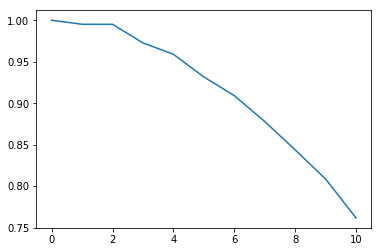

In [70]:
r_theta = []
for i in range(0,11):
    #print(i)
    r_theta.append(create_teleport(i/10.0, 0, 0))
plt.plot(r_theta)
plt.show()

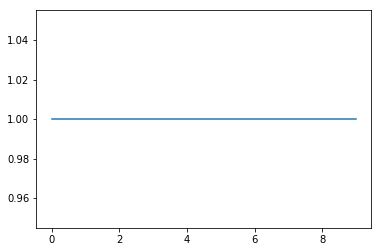

In [68]:
r_phi = []
for i in range(1,11):
    #print(i)
    r_phi.append(create_teleport(0, i/10.0, 0))
plt.plot(r_phi)
plt.show()

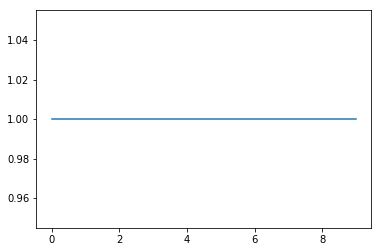

In [72]:
r_lam = []
for i in range(1,11):
    #print(i)
    r_lam.append(create_teleport(0, 0, i/10.0))
plt.plot(r_lam)
plt.show()